# Dataset Preprocessing

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


dataset = pd.read_csv('randomScatter4.csv')

X = np.array(dataset[['x', 'y']])
y = np.array([0 if z == 'a' else 1 if z =='b' else 2 if z == 'c' else 3 for z in dataset['z']])

dataset.shape

(1061, 3)

# Model Training and Predicting

### TRAIN TEST SPLITTING DATA

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

### LOGISTIC REPGRESSION MODEL

In [3]:
logistic_model = LogisticRegression(max_iter=10000)

logistic_model.fit(X_train, y_train)

logitic_pred = logistic_model.predict(X_test)

#### Hypertuning the KNN and RANDOM Models using GridSearchCV

### KNN MODEL

In [4]:
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors': [3,5,7]}, cv=5)

knn_model.fit(X_train, y_train)

knn_model = knn_model.best_estimator_

knn_pred = knn_model.predict(X_test) 

### RANDOM FOREST MODEL

In [5]:
random_model = GridSearchCV(RandomForestClassifier(), param_grid={'n_estimators': [50, 100, 150]}, cv=5)

random_model.fit(X_train, y_train)

random_model = random_model.best_estimator_

random_pred = random_model.predict(X_test)

### Using Voting Classifier to create a new better model


In [6]:
from sklearn.ensemble import VotingClassifier

voting_model = VotingClassifier(
    estimators=[('Knn', knn_model), ('Random', random_model)]
)

### Using Grid Search to find the best params for Votting Classifier Model

In [12]:
params = {
    'voting': ['hard', 'soft'],
    'weights': [(6, 4), (5, 5), (4, 6), (7, 3), (3,7)]  # Integer weights
}

grid_model = GridSearchCV(estimator=voting_model, param_grid=params, cv=5)
grid_model.fit(X_train, y_train)

voting_model = grid_model.best_estimator_

print("Train Accuracy:", voting_model.score(X_train, y_train))
print("Test Accuracy:", voting_model.score(X_test, y_test))


voting_pred = voting_model.predict(X_test)

Train Accuracy: 0.9610849056603774
Test Accuracy: 0.9389671361502347


# Stats Visualization and Comparison

### ACTUAL VS PREDICTED VALUES FOR ALL MODELS

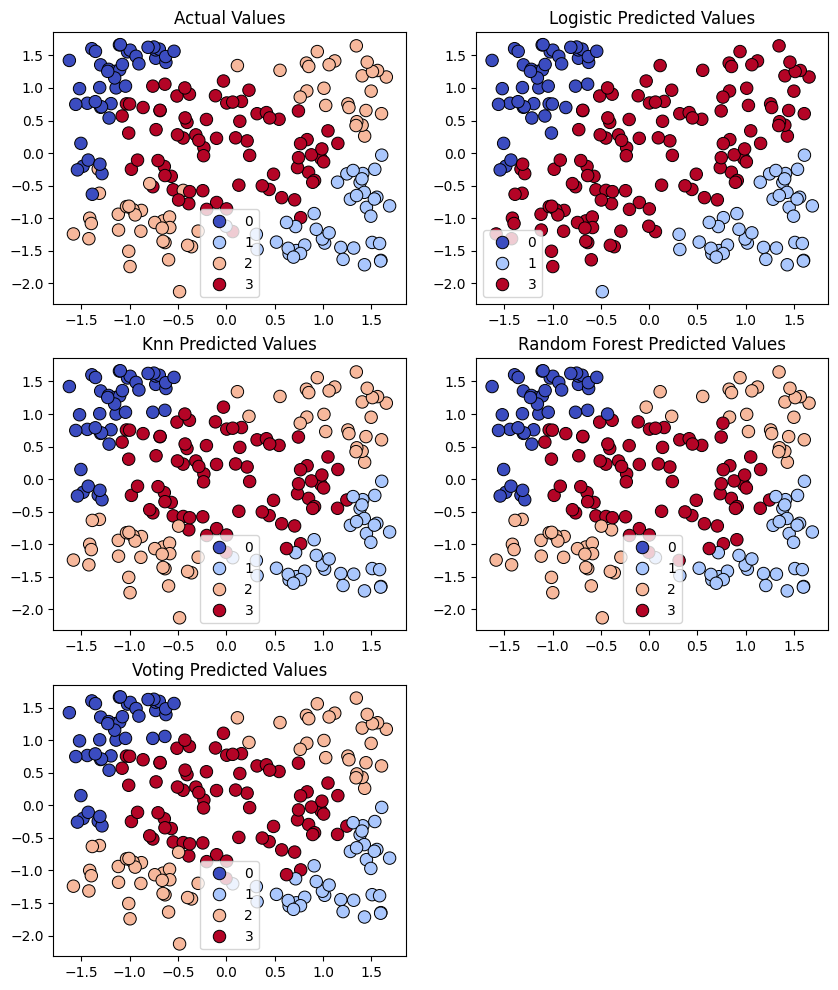

In [8]:
plt.figure(figsize=(10, 12))

kwargs = dict(palette='coolwarm', edgecolors='k', legend=True, x=X_test[:, 0], y=X_test[:, 1], s=80)

plt.subplot(3,2,1)
plt.title('Actual Values')
sns.scatterplot(hue=y_test, **kwargs)

plt.subplot(3,2,2)
plt.title('Logistic Predicted Values')
sns.scatterplot(hue=logitic_pred, **kwargs)

plt.subplot(3,2,3)
plt.title('Knn Predicted Values')
sns.scatterplot(hue=knn_pred, **kwargs)

plt.subplot(3,2,4) 
plt.title('Random Forest Predicted Values')
sns.scatterplot(hue=random_pred, **kwargs)

plt.subplot(3,2,5) 
plt.title('Voting Predicted Values')
sns.scatterplot(hue=voting_pred, **kwargs)

plt.show()


### Classification Report for each model

In [9]:
from sklearn.metrics import classification_report


cr_logistic, cr_knn, cr_random= classification_report(y_test, logitic_pred, output_dict=True), classification_report(y_test, knn_pred,output_dict=True), classification_report(y_test, random_pred,output_dict=True)
cr_voting = classification_report(y_test, voting_pred, output_dict=True)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [10]:
df_logistic = pd.DataFrame(cr_logistic).transpose()
df_knn = pd.DataFrame(cr_knn).transpose()
df_random = pd.DataFrame(cr_random).transpose()
df_voting = pd.DataFrame(cr_voting).transpose()

df_logistic.pop('support')
df_knn.pop('support')
df_random.pop('support')
df_voting.pop('support')

0                42.000000
1                41.000000
2                56.000000
3                74.000000
accuracy          0.938967
macro avg       213.000000
weighted avg    213.000000
Name: support, dtype: float64

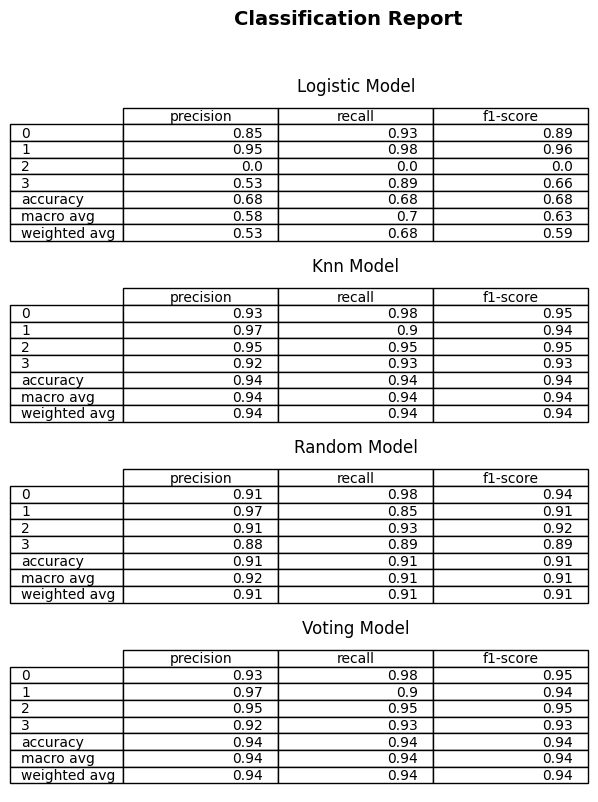

In [11]:
plt.figure(figsize=(6, 9))

plt.subplot(4,1,1)
plt.table(cellText=df_logistic.round(2).values, colLabels=df_logistic.columns, rowLabels=df_logistic.index, loc='center')
plt.axis('off')
plt.title('Logistic Model')


plt.subplot(4,1,2)
plt.table(cellText=df_knn.round(2).values, colLabels=df_knn.columns, rowLabels=df_knn.index, loc='center')
plt.axis('off')
plt.title('Knn Model')


plt.subplot(4,1,3)
plt.table(cellText=df_random.round(2).values, colLabels=df_random.columns, rowLabels=df_random.index, loc='center')
plt.axis('off')
plt.title('Random Model')

plt.subplot(4,1,4)
plt.table(cellText=df_voting.round(2).values, colLabels=df_voting.columns, rowLabels=df_voting.index, loc='center')
plt.axis('off')
plt.title('Voting Model')

plt.suptitle('Classification Report', fontweight='bold', fontsize='14')
plt.show()